In [7]:
import os

os.environ["http_proxy"] = "http://localhost:7890"
os.environ["https_proxy"] = "http://localhost:7890"

3.2获取金融市场数据

3.2.1下载数据到指定目录

使用Qlib内置的数据源并下载到本地目录，用于后续研究使用：

In [9]:
import qlib
# from qlib.contrib.model.pytorch_alstm_ts import ALSTM
from qlib.constant import REG_CN
import os
# 忽略警告
import warnings

warnings.filterwarnings('ignore')

data_uri = ':/data/qlib/qlib_data/cn_data'
data_uri = 'H' + data_uri if os.path.exists('H' + data_uri) else 'E' + data_uri
# GetData().qlib_data(target_dir=data_uri, region=REG_CN)
qlib.init(provider_uri=data_uri, region=REG_CN)

[15916:MainThread](2024-03-05 22:01:27,950) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[15916:MainThread](2024-03-05 22:01:27,953) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[15916:MainThread](2024-03-05 22:01:27,954) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('H:/data/qlib/qlib_data/cn_data')}


3.2.3数据核心模块类

Qlib中关于数据主要有以下三个模块：

Data Loader: 从数据源加载数据，数据源可以是已经转换为qlib内置格式的数据，也可以是其他外部数据；

Data Handler: 对数据进行预处理，比如常见的缺失值、标准化等；

Dataset: 为模型的训练准备数据，类似Pytorch中的Dataset。

1)QlibDataLoader

In [8]:
from qlib.data.dataset.loader import QlibDataLoader

# 除了直接加载原始特征，有时我们需要对不同的原始特征做一些运算生成新的特征，比如我们想计算收盘价的均线。这时我们可以使用qlib的算式表达式功能，直接在加载时进行计算
QlibDataLoader(config=(
    ['$open', '$high', '$low', '$close', '$volume', '$change', '$factor', 'EMA($close, 10)', 'EMA($close, 30)',
     '$close/$factor'],
    ['open', 'high', 'low', 'close', 'volume', 'change', 'factor', 'EMA10', 'EMA30', 'raw_close'])
).load(instruments=['SH600519'], start_time='20090105', end_time='20200925')

,,open,high,low,close,volume,change,factor,EMA10,EMA30,raw_close
datetime,instrument,,,,,,,,,,
2009-01-05,SH600519,14.088112,14.291379,13.766463,13.944010,10497168.0,-0.002944,0.171244,14.129837,14.297894,81.427505
2009-01-06,SH600519,13.830784,14.049516,13.545165,13.986463,29655306.0,0.003045,0.171245,14.100548,14.274892,81.675400
2009-01-07,SH600519,14.013484,14.023776,13.727865,13.739442,11843768.0,-0.017661,0.171244,14.028399,14.235709,80.232903
2009-01-08,SH600519,13.541313,13.968466,13.406219,13.963312,14483822.0,0.016294,0.171245,14.015625,14.215948,81.540199
2009-01-09,SH600519,13.841075,13.965878,13.766464,13.803778,9171688.0,-0.011425,0.171244,13.974638,14.186284,80.608597
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-21,SH600519,360.617889,360.617889,355.057648,355.087494,10535369.0,-0.016637,0.213035,364.378723,363.418030,1666.800049
2020-09-22,SH600519,351.508484,359.386536,351.508484,354.850983,10920939.0,-0.000666,0.213035,362.646393,362.865326,1665.689819
2020-09-23,SH600519,348.312958,354.919189,345.334717,351.504211,16769754.0,-0.009432,0.213035,360.620544,362.132355,1649.979858


In [15]:
# instruments可以是个股代码（返回时序数据）或股票池代码（返回面板数据）
QlibDataLoader(config=(
    ['EMA($close, 10)', 'EMA($close, 30)'],
    ['EMA10', 'EMA30'])
).load(instruments='csi100',  # 沪深300股票池代码，在instruments文件夹下有对应的sh000300.txt
       start_time='20190101', end_time='20190110')

EMA10      EMA30
datetime   instrument                      
2019-01-02 SH600000     7.092837   7.416340
           SH600009    16.543882  16.482178
           SH600010     5.285407   5.401525
           SH600011     2.703071   2.677347
           SH600015     5.976167   6.117362
...                          ...        ...
2019-01-10 SZ002415     8.722863   8.680843
           SZ002450     5.595629   6.127040
           SZ002594     2.021440   2.096986
           SZ002736     1.119112   1.119617
           SZ300059    10.143766  10.217589

[700 rows x 2 columns]

qlib把类似“EMA”称为算子（operator），qlib中全部支持的算子可以在以下源码中找到：/qlib/data/ops.py中，主要有：

ChangeInstrument, Rolling, Ref, Max, Min, Sum, Mean, Std, Var, Skew, Kurt, Med, Mad, Slope, Rsquare, Resi, Rank, Quantile, Count, EMA, WMA, Corr, Cov, Delta, Abs, Sign, Log, Power, Add, Sub, Mul, Div, Greater, Less, And, Or, Not, Gt, Ge, Lt, Le, Eq, Ne, Mask, IdxMax, IdxMin, If, Feature, PFeature，




In [16]:
# 有时我们需要对计算的数据进行分组，最常用的是分为特征组“feature”和“label”组，此时我们可以传入dict格式的参数至config中
QlibDataLoader(config={
    'feature': (
        ['EMA($close, 10)', 'EMA($close, 30)'],
        ['EMA10', 'EMA30']),
    'label': (
        ["Ref($close, -1)/$close-1"],
        ['next_ret'])}
).load(instruments='csi100', start_time='20190101', end_time='20190110')

feature                label
                           EMA10      EMA30  next_ret
datetime   instrument                                
2019-01-02 SH600000     7.092837   7.416340  0.011340
           SH600009    16.543882  16.482178 -0.013497
           SH600010     5.285407   5.401525  0.013605
           SH600011     2.703071   2.677347 -0.026426
           SH600015     5.976167   6.117362  0.005472
...                          ...        ...       ...
2019-01-10 SZ002415     8.722863   8.680843  0.004236
           SZ002450     5.595629   6.127040 -0.033163
           SZ002594     2.021440   2.096986  0.003480
           SZ002736     1.119112   1.119617  0.001148
           SZ300059    10.143766  10.217589  0.011990

[700 rows x 3 columns]

2）Data Handler

通过Data Loader加载特征后，模型训练前需要对特征数据进行一些预处理，比如缺失值、标准化等处理。这是Data Handler主要任务。我们先看一个案例：



Return    12
dtype: int64


[15916:MainThread](2024-03-05 22:17:43,000) INFO - qlib.timer - [log.py:127] - Time cost: 14.057s | Loading data Done
[15916:MainThread](2024-03-05 22:17:43,003) INFO - qlib.timer - [log.py:127] - Time cost: 0.002s | DropnaProcessor Done
[15916:MainThread](2024-03-05 22:17:43,013) INFO - qlib.timer - [log.py:127] - Time cost: 0.010s | CSZScoreNorm Done
[15916:MainThread](2024-03-05 22:17:43,014) INFO - qlib.timer - [log.py:127] - Time cost: 0.013s | fit & process data Done
[15916:MainThread](2024-03-05 22:17:43,015) INFO - qlib.timer - [log.py:127] - Time cost: 14.072s | Init data Done


Return    0
dtype: int64


array([[<Axes: title={'center': 'Return'}>]], dtype=object)

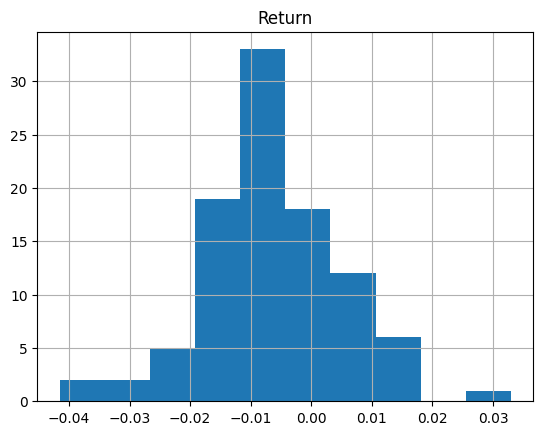

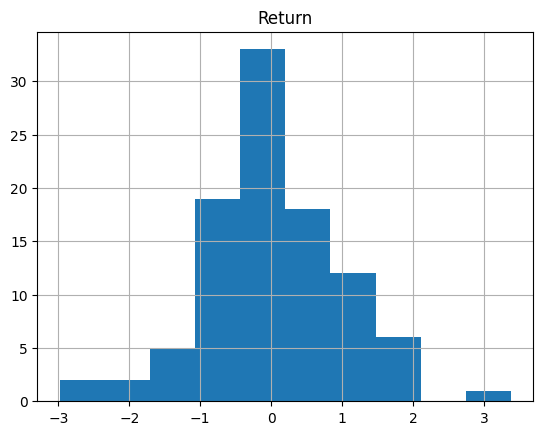

In [18]:
from qlib.data.dataset.handler import DataHandlerLP
from qlib.data.dataset.processor import CSZScoreNorm, DropnaProcessor

##################################
qdl = QlibDataLoader(config=(['$close/Ref($close, 1)-1'], ['Return']))
df = qdl.load(instruments='csi100', start_time='20190101', end_time='20190110')
# 是否有空值
print(df.isna().sum())
# 原始数据分布
df.xs('2019-01-10').hist()
##################################
dh = DataHandlerLP(  # DataHandler with (L)earnable (P)rocessor
    instruments='csi100', start_time='20190101', end_time='20190110',
    learn_processors=[DropnaProcessor(), CSZScoreNorm()],  # 先去空值，再截面标准化
    data_loader=qdl)
#     - DK_R / self._data: the raw data loaded from the loader
#     - DK_I / self._infer: the data processed for inference
#     - DK_L / self._learn: the data processed for learning model.
df_hdl = dh.fetch(data_key=DataHandlerLP.DK_L)  # (D)ata (K)ey 'learn'
# 查看是否还存在空值
print(df_hdl.isna().sum())
# CSZScoreNorm截面标准化处理后的数据分布
df_hdl.xs('2019-01-10').hist()

从以上的例子可以看出，实例化Data Handler需要以下几个参数：

基本信息，如instruments，start_time，end_time

infer_processors，数据处理器，列表格式。由Dataloader加载的数据会依次经过该列表中的processor进行处理。（后面会详细介绍）

data_loader，数据加载器实例。

Data Handler实例化之后，通过fetch方法获取处理后的数据，这里的参数DataHandlerLP.DK_L会在Learn Processor VS Infer Processor详细介绍。

3）Dataset

Dataset主要是为模型训练注入数据，其中主要的参数有：

handler：实例化的Data Handler

segment：训练、验证、测试数据集的划分

一个完整的代码示例如下：

In [19]:
from qlib.data.dataset.processor import ZScoreNorm
from qlib.data.dataset import DatasetH

market = 'csi100'
qdl_ma_gp = QlibDataLoader(config={
    'feature': (
        ['EMA($close, 10)', 'EMA($close, 30)'],
        ['EMA10', 'EMA30']),
    'label': (
        ["Ref($close, -1)/$close-1"],  # Ref($close, -1)表示下一日收盘价
        ['next_ret'])})  # 下一日收益率
dh_pr_test = DataHandlerLP(
    instruments='csi100',
    start_time='20160101',
    end_time='20191231',
    process_type=DataHandlerLP.PTYPE_I,
    # PTYPE_I = "independent"
    # # - self._infer will be processed by shared_processors + infer_processors
    # # - self._learn will be processed by shared_processors + learn_processors
    # PTYPE_A = "append"
    # # - self._infer will be processed by shared_processors + infer_processors
    # # - self._learn will be processed by shared_processors + infer_processors + learn_processors    
    infer_processors=[ZScoreNorm(fit_start_time='20160101', fit_end_time='20181231')],
    # processor that applies z-score normalization
    learn_processors=[CSZScoreNorm()],  # processor that applies cross sectional z-score normalization
    shared_processors=[DropnaProcessor()],
    data_loader=qdl_ma_gp)
ds = DatasetH(dh_pr_test, segments={"train": ('20160101', '20181231'), "test": ('20190101', '20191231')})
# 准备训练数据
ds.prepare('train')

[15916:MainThread](2024-03-05 23:03:00,756) INFO - qlib.timer - [log.py:127] - Time cost: 28.692s | Loading data Done
[15916:MainThread](2024-03-05 23:03:00,763) INFO - qlib.timer - [log.py:127] - Time cost: 0.005s | DropnaProcessor Done
[15916:MainThread](2024-03-05 23:03:00,822) INFO - qlib.timer - [log.py:127] - Time cost: 0.056s | ZScoreNorm Done
[15916:MainThread](2024-03-05 23:03:01,927) INFO - qlib.timer - [log.py:127] - Time cost: 1.103s | CSZScoreNorm Done
[15916:MainThread](2024-03-05 23:03:01,928) INFO - qlib.timer - [log.py:127] - Time cost: 1.170s | fit & process data Done
[15916:MainThread](2024-03-05 23:03:01,929) INFO - qlib.timer - [log.py:127] - Time cost: 29.865s | Init data Done


EMA10     EMA30  next_ret
datetime   instrument                              
2016-01-04 SH600000   -0.120305 -0.120022  0.469636
           SH600010   -0.119592 -0.118803  1.274610
           SH600011   -0.140072 -0.140143 -0.120704
           SH600015   -0.124963 -0.125563  0.276519
           SH600016   -0.099245 -0.100489  0.520611
...                         ...       ...       ...
2018-12-28 SZ002415   -0.121156 -0.120752 -0.216053
           SZ002450   -0.129216 -0.127331 -2.704178
           SZ002594   -0.142672 -0.142801 -1.851776
           SZ002736   -0.146067 -0.146235 -0.427841
           SZ300059   -0.116066 -0.115437 -1.064005

[68157 rows x 3 columns]

In [20]:
# 准备测试数据
ds.prepare('test')

EMA10     EMA30  next_ret
datetime   instrument                              
2019-01-02 SH600000   -0.125632 -0.124848  0.591682
           SH600009   -0.094255 -0.094215 -0.693500
           SH600010   -0.131899 -0.131677  0.708892
           SH600011   -0.140658 -0.141039 -1.362451
           SH600015   -0.129555 -0.129227  0.288035
...                         ...       ...       ...
2019-12-31 SZ002594   -0.143487 -0.143866  0.547622
           SZ002736   -0.144432 -0.144773  1.530397
           SZ300015   -0.083752 -0.082330 -0.073581
           SZ300059   -0.099507 -0.100803  0.431442
           SZ300498   -0.146499 -0.146646  1.098290

[23969 rows x 3 columns]